# 假设检验基础

In [1]:
# import image module
from IPython.display import Image

# get the image
Image(url="WechatIMG30.jpeg", width=300, height=300)

In [2]:
# get the image
Image(url="WechatIMG31.jpeg", width=300, height=300)

H0:零假设、原假设或 Null Hypothesis
H1:对立假设、备择假设或 Alternative Hypothesis


现实中,由于统计工作的滞后性,我们经常遇到用一个样本和已知的一个总体作比较的情形。我们先假设这个样本来自这个已知总体,然后根据此样本均值在已知总体的抽构样分布中是否处于极端区域,来判断是否拒绝这个假设。

虽然想得到的结论是H1，但得先假设H0成立，然后通过检验拒绝H0，再证实H1


In [3]:
# get the image
Image(url="WechatIMG32.jpeg", width=300, height=300)

# T分布，t值假设检验
- t分布适用于n小于30的场景
- t分布为对称分布，关于t=0对称
- 单样本t检验：样本均数与总体均数的比较的t检验。比较的目的是推断样本所代表的未知总体均数μ与已知的总体均数μ0有无差别。
- t分布，预测总结了一切均值抽样分布，不用专门去做均值抽样

In [67]:
# generate two arrays with ND
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# noraml(mean, var, size)
S1 = np.random.normal(30, 3, 1500).astype(int)
S2 = np.random.normal(10, 2, 1500).astype(int)

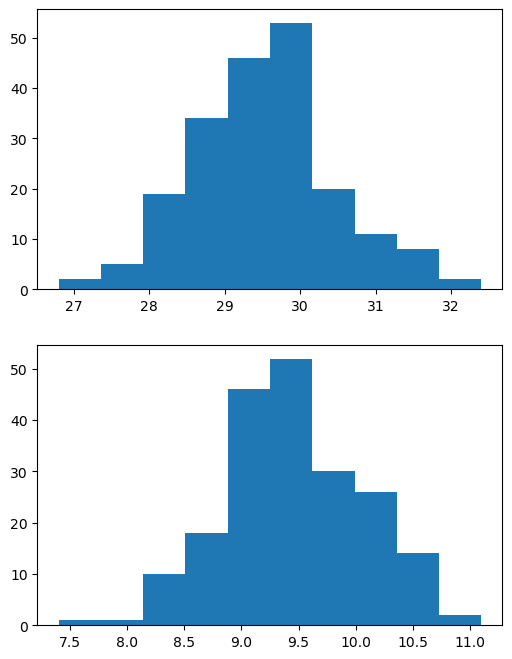

In [68]:
# 均值抽样
def sample_testing(data):
    sample_size = 10  # 样本大小为10
    test_round = 200  # 抽样次数
    df = pd.DataFrame(columns=['sample_mean'])
    for round in range(test_round):
        sample = np.random.choice(data, sample_size)
        sample_mean = sample.mean()
        df.loc[len(df)] = sample_mean
    return df

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.hist(sample_testing(S1))
ax2.hist(sample_testing(S2))
plt.show()

## 处理对称轴和跨度
- （样本数据 - 样本均值）/ 样本标准差
- 转变为标准正态分布 -> N(0,1)

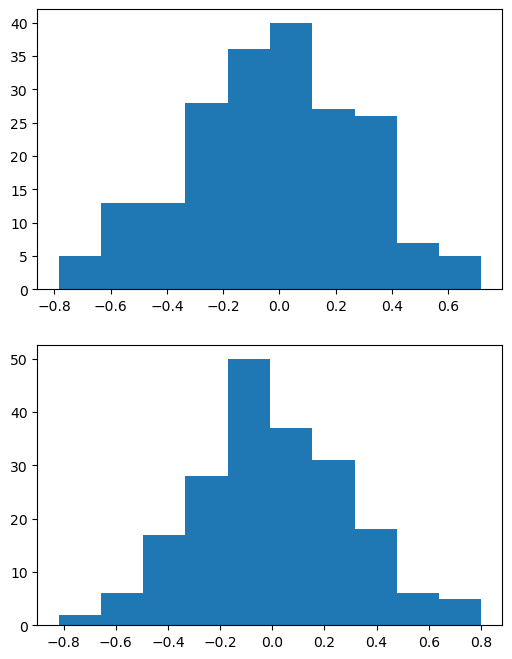

In [69]:
# 偏离值， 保证数值偏离总体均值落在0左右
S1 = (S1 - S1.mean())/(np.std(S1))
S2 = (S2 - S2.mean())/(np.std(S2))

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.hist(sample_testing(S1))
ax2.hist(sample_testing(S2))
plt.show()

In [53]:
# 标准差
Image(url="WechatIMG33.png", width=300, height=300)

# 1. 统计量t
- t = （抽样样本均值 - 整体样本均值）/（样本标准差 / sqrt(抽样样本数量)）
- t值对应的就是横坐标的值
- 在t值之后的曲线下面积就是P值 （p-value）
- SE = s / sqrt(n), 抽样样本均值的标准误差（Standard Error）

In [54]:
# t值
Image(url="WechatIMG34.png", width=300, height=300)

### t值抽样检测（单样本）
- 原理相似，确定样本容量，抽样次数

In [80]:
# t值抽样检测
def t_val_sample_testing(data):
    sample_size = 20  # 样本大小为20
    test_round = 1000  # 抽一千次
    df = pd.DataFrame(columns=['sample_t_val'])
    for round in range(test_round):
        sample = np.random.choice(data, sample_size)
        sample_t_val = (sample.mean() - data.mean()) / (np.std(sample) / np.sqrt(sample_size))
        df.loc[len(df)] = sample_t_val
    return df

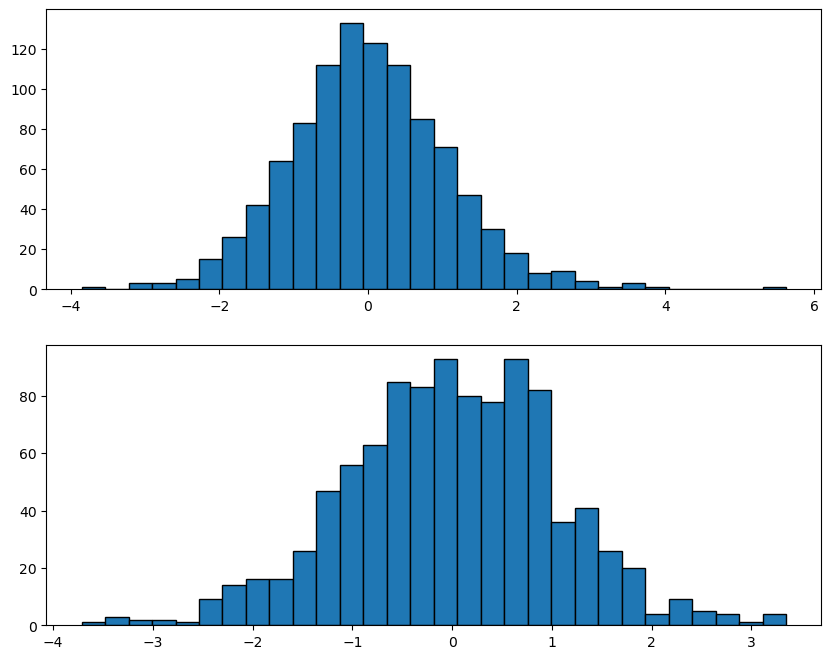

In [95]:
S_test1 = np.random.normal(30, 3, 1500).astype(int)
S_test2 = np.random.normal(10, 2, 1500).astype(int)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.hist(t_val_sample_testing(S_test1),bins=30,edgecolor='black')
ax2.hist(t_val_sample_testing(S_test2),bins=30,edgecolor='black')
plt.show()

In [55]:
Image(url="WechatIMG35.jpeg", width=300, height=300)

## 2. t检验自由度 （degree of freedom）
- df = n - 1，样本容量n - 1 （仅限于单样本检验）
- 不同自由度t分布形状不一样（df越小，t分布越扁，与正态分布差别越大）

## 3. t临界值表
- 先确认为单边还是双边检验
- 再查找对应的自由度
- 再确认显著水平α（比如0.05）
- 最后得到精确的临界值t

## 4. P-value
- 抽样一次,算出t值,划一条线,这条线到极端方向阴影部分的面积
- 如果p<显著水平α,则拒绝H0,如果p>α,则接受H0。


## 5. 第一类错误&第二类错误（Type I error & Type II error）
- 第一类错误: 原假设H0实际为真时,拒绝了H0。（false positive）
- 第二类错误：原假设H0实际为假时,接受了H0。

## 6. 置信区间（Confidence Interval）
- 通过单次抽样，得到抽样均分
- 通过已知的显著水平，样本自由度，和单双边检验需找到对应的t临界值
- 通过公式计算， 浮动范围 = t临界值 * std(抽样样本) / sqrt(样本容量)
- 反推均值抽样分布的95%接受域区间 = 单次抽样均分 +- 浮动范围
- 目的：得到抽样均值范围

In [133]:
Image(url="WechatIMG36.png", width=300, height=300)

### 构造置信区间

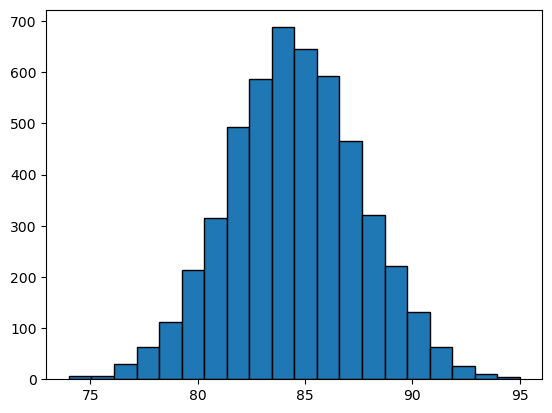

In [115]:
sample = np.random.normal(85, 3, 5000).astype(int)
plt.hist(sample, edgecolor = 'black', bins=20)
plt.show()

In [134]:
# random_pick
from scipy.stats import t
sample_size = 20
sample_pick = np.random.choice(sample, size=sample_size)
sample_mean = sample_pick.mean()  # 样本均值
sample_std = np.std(sample_pick)  # 样本标准差
df = sample_size - 1  # 自由度
alpha = 0.05
T_critical_val = t.ppf(q=1-0.05/2,df=df)  # 双边t检验
scope = T_critical_val * sample_std / np.sqrt(sample_size)  # 波动范围
limit_left = sample_mean - scope
limit_right = sample_mean + scope
print(sample_mean)
print('置信区间：[%3f,%3f]' % (limit_left, limit_right))  # 通过单次抽样，反推出均值抽样分布95%接受区间

84.1
置信区间：[82.845058,85.354942]


## 7. 置信水平 （confidence level）
- 这个置信区间可能包含了总体均值u。（区间是由随机的一组抽样样本计算出来的，不一定正确）
- 只要抽样均值落在接受域内,则构造出来的置信区间,必然包含总体均值μ。而只要抽样均值落在接受域外,也就是落在了拒绝域内,则构造出来的置信区间,必然不包含总体均值μ。
- 95%置信水平，不是指某一个具体的置信区间包含总体均值u的概率,而是假如有能力进行重复大量的抽样,并构造大量的置信区间的话,其中95%的置信区间,必然包含总体均值u。

In [159]:
# test 1000 times
total_mean = sample.mean()
count = 0  # 均值落在区间的次数
for i in range(10000):
    sample_pick = np.random.choice(sample, size=sample_size)
    sample_mean = sample_pick.mean()  # 样本均值
    sample_std = np.std(sample_pick)  # 样本标准差
    scope = T_critical_val * sample_std / np.sqrt(sample_size)
    limit_left = sample_mean - scope
    limit_right = sample_mean + scope
    if (total_mean >= limit_left) and (total_mean <= limit_right):
        count+=1
print(round(count/10000, 2))  # 整体均值落在多次重复创建的区间中的概率在95%左右

0.95
